<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/viola_matias_parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

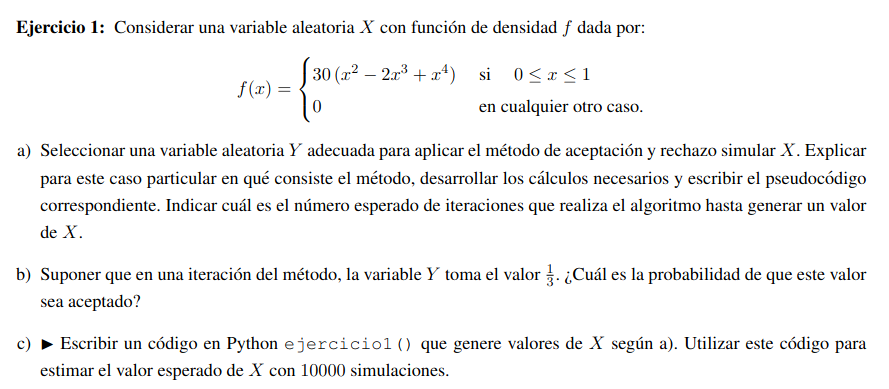

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
import numpy as np

## Ejercicio

In [24]:
C = 1.875
def ejercicio1():
  while True:
    muestra = random()
    p_propuesta = 1
    p_objetivo = f(muestra)
    if random() <= p_objetivo / (p_propuesta * C):
      return muestra

In [29]:
NUMERO_DE_MUESTRAS = 100_000
muestras = [ejercicio1() for _ in range(NUMERO_DE_MUESTRAS)]

esperanza = sum(muestras) / NUMERO_DE_MUESTRAS
print('Valor esperado estimado de X: ', esperanza)

Valor esperado estimado de X:  0.4997866960523103


## Chequeos auxiliares del parcial en general

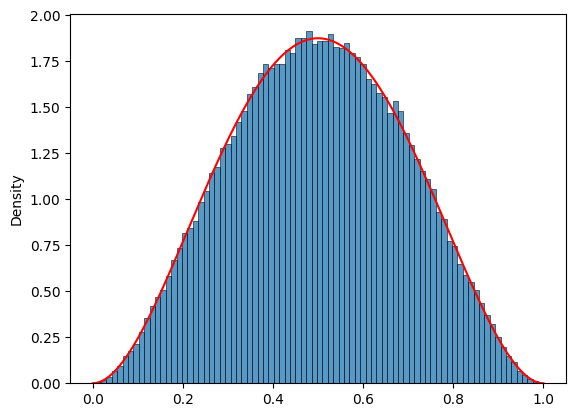

In [26]:
def f(x):
  return 30 * (x**2 - 2*x**3 + x**4)

dom = np.linspace(0,1,1000)
y = [f(x) for x in dom]

sns.lineplot(x=dom, y=y, color='red')
sns.histplot(muestras, stat='density')
plt.show()

In [27]:
def iteraciones_ejercicio1():
  contador_de_iteraciones = 0
  while True:
    contador_de_iteraciones += 1
    muestra = random()
    p_propuesta = 1
    p_objetivo = f(muestra)
    if random() <= p_objetivo / (p_propuesta * C):
      return contador_de_iteraciones

muestras = [iteraciones_ejercicio1() for _ in range(NUMERO_DE_MUESTRAS)]

esperanza = sum(muestras) / NUMERO_DE_MUESTRAS
print('numero estimado de itaraciones: ', esperanza)

numero estimado de itaraciones:  1.87287


In [28]:
def experimento_aceptar_y(y):
  muestra = y
  p_propuesta = 1
  p_objetivo = f(muestra)
  if random() <= p_objetivo / (p_propuesta * C):
    return 1
  else:
    return 0

muestras = [experimento_aceptar_y(1/3) for _ in range(NUMERO_DE_MUESTRAS)]

esperanza = sum(muestras) / NUMERO_DE_MUESTRAS
print('probabilidad estimada de aceptar y=1/3: ', esperanza)

probabilidad estimada de aceptar y=1/3:  0.7902
